In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Antes de mais nada e como sempre, vamos baixar os dados e verificar a sua consistência.

In [2]:
df = pd.read_csv('Data/03B-perfils-com-rfdv-02.csv', index_col=0)

In [3]:
df.head()

,distinct_id,count_eventos,Browser,city,country_code,created,initial_referring_domain,last_seen,os,region,Source,recencia,duracao,frequencia
0,QKK4JVKAB9BFV2yLVoPCccYAmXI9QwRs.88dcefc39941b...,8287,Chrome 84.0,São Paulo,BR,2020-05-08 07:11:46,$direct,2020-07-28 15:34:10,Windows,Sao Paulo,LA Criar Conta,15,81,3
1,1723852f6f284-05818830b468d6-134b3c29-49d40-17...,5793,Chrome 84.0,Sao Jose do Rio Preto,BR,2020-05-21 11:40:59,leads2b.com,2020-08-05 18:35:38,Windows,Sao Paulo,CC CNPJ - Painel de Dados - E-mails,7,76,13
2,1724d0fbffc130-045e6b955db998-d373666-100200-1...,4296,Chrome 83.0,Guarapuava,BR,2020-05-25 12:19:35,$direct,2020-06-05 09:17:50,Windows,Parana,LA Criar Conta,68,10,10
3,SGIRpUNfoHiJMGa2AO7VlWg6mjGlDGHt.27dd4e881e36a...,3668,Chrome 84.0,Londrina,BR,2020-05-11 08:15:58,$direct,2020-08-12 13:35:45,Windows,Parana,LA Criar Conta,0,93,36
4,17231edb3c2d1-023a308ef89129-d373666-1fa400-17...,3403,Chrome 83.0,Salto,BR,2020-05-20 05:52:36,$direct,2020-07-02 17:28:51,Windows,Sao Paulo,LA Criar Conta,41,43,12


In [4]:
df.shape

(8200, 14)

### temos alguns NaN, vamos limpar

In [5]:
df.isna().any()

distinct_id                 False
count_eventos               False
Browser                     False
city                         True
country_code                 True
created                     False
initial_referring_domain    False
last_seen                   False
os                          False
region                       True
Source                      False
recencia                    False
duracao                     False
frequencia                  False
dtype: bool

In [6]:
df.country_code.isnull().sum()
df.region.isnull().sum()
df.city.isnull().sum()

108

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.isna().any()

distinct_id                 False
count_eventos               False
Browser                     False
city                        False
country_code                False
created                     False
initial_referring_domain    False
last_seen                   False
os                          False
region                      False
Source                      False
recencia                    False
duracao                     False
frequencia                  False
dtype: bool

### criar um DataFrame apenas com as features numéricas

In [9]:
df_num = df[['count_eventos', 'recencia', 'duracao', 'frequencia']].copy()

In [10]:
df_num.dtypes

count_eventos    int64
recencia         int64
duracao          int64
frequencia       int64
dtype: object

### fazer normalização das features numéricas com RobustScaler, que parece ser o mais apropriado

In [11]:
x = df_num.values

In [12]:
scaler = RobustScaler()

In [13]:
x_scaled = scaler.fit_transform(x)

In [14]:
df_num_nor = pd.DataFrame(x_scaled, columns = df_num.columns)

In [15]:
df_num_nor.tail()

,count_eventos,recencia,duracao,frequencia
8087,-0.282609,-0.421053,0.0,0.0
8088,-0.282609,1.105263,0.0,0.0
8089,-0.282609,1.131579,0.0,0.0
8090,-0.282609,-0.184211,0.0,0.0
8091,-0.282609,0.815789,0.0,0.0


### transformar as features categóricas em numéricas com One-hot

In [16]:
df_cat = df[['country_code', 'region', 'city', 'Browser', 'os', 'initial_referring_domain', 'Source']].copy()

In [17]:
df_cat.head()

,country_code,region,city,Browser,os,initial_referring_domain,Source
0,BR,Sao Paulo,São Paulo,Chrome 84.0,Windows,$direct,LA Criar Conta
1,BR,Sao Paulo,Sao Jose do Rio Preto,Chrome 84.0,Windows,leads2b.com,CC CNPJ - Painel de Dados - E-mails
2,BR,Parana,Guarapuava,Chrome 83.0,Windows,$direct,LA Criar Conta
3,BR,Parana,Londrina,Chrome 84.0,Windows,$direct,LA Criar Conta
4,BR,Sao Paulo,Salto,Chrome 83.0,Windows,$direct,LA Criar Conta


In [18]:
one_hot = OneHotEncoder()

In [19]:
one_hotted = one_hot.fit_transform(df_cat).toarray()

In [20]:
df_cat_nor = pd.DataFrame(one_hotted)

In [21]:
df_cat_nor.columns = one_hot.get_feature_names()

In [22]:
df_cat_nor.head()

,x0_AO,x0_AR,x0_BR,x0_CA,x0_CH,x0_CN,x0_DE,x0_EG,x0_ES,x0_FR,x0_GB,x0_HK,x0_IL,x0_IN,x0_IT,x0_JP,x0_MX,x0_PE,x0_PT,x0_PY,x0_RU,x0_US,x0_UY,x0_VN,x1_Acre,x1_Alagoas,x1_Amapa,x1_Amazonas,x1_Ancash,x1_Asuncion,x1_Aveiro,x1_Bahia,x1_Bavaria,x1_Beijing,x1_Cairo Governorate,x1_California,x1_Ceara,x1_Central District,x1_Central and Western District,x1_Coimbra,x1_Connecticut,x1_Dakahlia,x1_Departamento de Montevideo,x1_Entre Rios,x1_Espirito Santo,x1_Faro,x1_Federal District,x1_Florida,x1_Fujian,x1_Georgia,...,x4_iOS,x5_$direct,x5_app.leads2b.com,x5_bmail.uol.com.br,x5_bmail1.uol.com.br,x5_br.search.yahoo.com,x5_com.google.android.gm,x5_com.google.android.googlequicksearchbox,x5_consultacnpj.com,x5_l.facebook.com,x5_l.workplace.com,x5_leads2b.com,x5_m.facebook.com,x5_mail.google.com,x5_mail.uol.com.br,x5_mailserver.alvoradapneus.com,x5_org.telegram.messenger,x5_webmail-seguro.com.br,x5_webmail.agrisuporte.com.br,x5_webmail.corretorassociadofmera.com.br,x5_webmail.mdb.com.br,x5_webmail.tecnolog.com.br,x5_webmail.thscargo.com.br,x5_webmail.wsicomex.com.br,x5_wmail.net2.com.br,x5_www.bing.com,x5_www.consultacnpj.com,x5_www.google.com,x5_www.google.com.br,x5_www.leads2b.com,x5_www.linkedin.com,x6_Assine Aqui,x6_CC CNPJ - Empresa Similar,x6_CC CNPJ - Limite Consultas,x6_CC CNPJ - Painel de Dados - E-mails,x6_CC CNPJ - Painel de Dados - Redes sociais,x6_CC CNPJ - Painel de Dados - Telefones,x6_CC CNPJ - Ver Todas Empresas,x6_CC Criar Conta,x6_CC Empresa - Busca Nome,x6_CC Segmento - Empresa Similar,x6_CC Segmento - Encontrar Agora,x6_CC Segmento - Limite Consultas,x6_CC Segmento - Painel de Dados - E-mails,x6_CC Segmento - Painel de Dados - Telefones,x6_CC Segmento - Ver Todas Empresas,x6_LA Criar Conta,x6_LA IS Lead,x6_LA IS Oportunidade,x6_unknown
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### hora de juntar tudo

In [23]:
df_nor = pd.merge(df_num_nor, df_cat_nor, left_index=True, right_index=True)

In [24]:
df_nor.head()

,count_eventos,recencia,duracao,frequencia,x0_AO,x0_AR,x0_BR,x0_CA,x0_CH,x0_CN,x0_DE,x0_EG,x0_ES,x0_FR,x0_GB,x0_HK,x0_IL,x0_IN,x0_IT,x0_JP,x0_MX,x0_PE,x0_PT,x0_PY,x0_RU,x0_US,x0_UY,x0_VN,x1_Acre,x1_Alagoas,x1_Amapa,x1_Amazonas,x1_Ancash,x1_Asuncion,x1_Aveiro,x1_Bahia,x1_Bavaria,x1_Beijing,x1_Cairo Governorate,x1_California,x1_Ceara,x1_Central District,x1_Central and Western District,x1_Coimbra,x1_Connecticut,x1_Dakahlia,x1_Departamento de Montevideo,x1_Entre Rios,x1_Espirito Santo,x1_Faro,...,x4_iOS,x5_$direct,x5_app.leads2b.com,x5_bmail.uol.com.br,x5_bmail1.uol.com.br,x5_br.search.yahoo.com,x5_com.google.android.gm,x5_com.google.android.googlequicksearchbox,x5_consultacnpj.com,x5_l.facebook.com,x5_l.workplace.com,x5_leads2b.com,x5_m.facebook.com,x5_mail.google.com,x5_mail.uol.com.br,x5_mailserver.alvoradapneus.com,x5_org.telegram.messenger,x5_webmail-seguro.com.br,x5_webmail.agrisuporte.com.br,x5_webmail.corretorassociadofmera.com.br,x5_webmail.mdb.com.br,x5_webmail.tecnolog.com.br,x5_webmail.thscargo.com.br,x5_webmail.wsicomex.com.br,x5_wmail.net2.com.br,x5_www.bing.com,x5_www.consultacnpj.com,x5_www.google.com,x5_www.google.com.br,x5_www.leads2b.com,x5_www.linkedin.com,x6_Assine Aqui,x6_CC CNPJ - Empresa Similar,x6_CC CNPJ - Limite Consultas,x6_CC CNPJ - Painel de Dados - E-mails,x6_CC CNPJ - Painel de Dados - Redes sociais,x6_CC CNPJ - Painel de Dados - Telefones,x6_CC CNPJ - Ver Todas Empresas,x6_CC Criar Conta,x6_CC Empresa - Busca Nome,x6_CC Segmento - Empresa Similar,x6_CC Segmento - Encontrar Agora,x6_CC Segmento - Limite Consultas,x6_CC Segmento - Painel de Dados - E-mails,x6_CC Segmento - Painel de Dados - Telefones,x6_CC Segmento - Ver Todas Empresas,x6_LA Criar Conta,x6_LA IS Lead,x6_LA IS Oportunidade,x6_unknown
0,179.847826,-0.552632,11.571429,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,125.630435,-0.763158,10.857143,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.086957,0.842105,1.428571,9.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,79.434783,-0.947368,13.285714,35.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,73.673913,0.131579,6.142857,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df_nor.shape

(8092, 1233)

In [26]:
# df_nor.to_csv('Data/04-perfils-normalizados.csv')

In [27]:
# df_num_nor.to_csv('Data/04B-perfils-normalizados-apenas-rfdv.csv')

In [28]:
# df_num.to_csv('Data/04C-perfils-normalizados-apenas-rfdv-sem-minmax.csv', index=False)

### OK, hora de rodar o K-means e criar nossos clusters.

antes de mais nada, vamos explorar quantos clusters deveríamos ter. começando pelo teste do cotovelo.

In [29]:
sse={}

In [30]:
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, n_init=25, max_iter=1000, random_state=0).fit(df_nor)
    df_nor["cluster"] = kmeans.labels_
    sse[k] = kmeans.inertia_

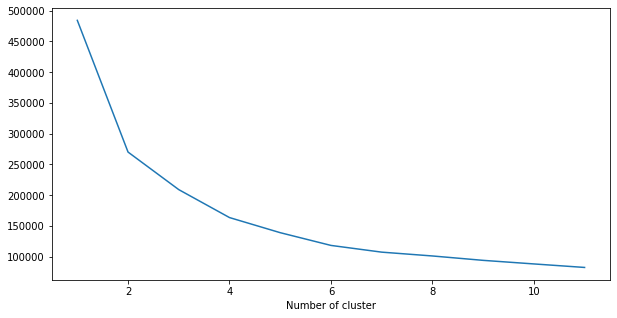

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

uhmm, não está perfeitamente claro, mas parece ser entre 4 e 5, um bom número! vamos tentar um teste de silhouette agora.

In [32]:
for nc in range(2, 10):
  print('Numero de grupos', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df_nor)
  ss = silhouette_score(df_nor, kmeans.labels_)
  print('Silhouette Score:', ss)
  print('-'*30)

Numero de grupos 2
Silhouette Score: 0.7412063528251555
------------------------------
Numero de grupos 3
Silhouette Score: 0.5668899581854601
------------------------------
Numero de grupos 4
Silhouette Score: 0.5677628559324394
------------------------------
Numero de grupos 5
Silhouette Score: 0.6003771249126895
------------------------------
Numero de grupos 6
Silhouette Score: 0.6079169193307018
------------------------------
Numero de grupos 7
Silhouette Score: 0.6122651640524805
------------------------------
Numero de grupos 8
Silhouette Score: 0.6178268672509062
------------------------------
Numero de grupos 9
Silhouette Score: 0.6128984480121247
------------------------------


aqui, as duas maiores notas foram de 3 e 4 clusters, mas elas não são tão altas assim.

vamos olhar diretamente para os dados clusterizados em 4 grupos e ver o que ele nos diz.

In [33]:
kmeans = KMeans(n_clusters=4, n_init=25, max_iter=1000, random_state=0).fit(df_nor)

In [34]:
# aqui vou aplicar os clusters na tabela original sem normalizações, para ficar mais legível
df["cluster"] = kmeans.labels_
df.groupby('cluster').describe()

count_eventos                                                                   recencia                                                    duracao                                                      frequencia                                                   
                count         mean          std     min     25%     50%     75%     max    count       mean        std  min   25%   50%   75%   max   count       mean        std   min   25%   50%   75%    max      count       mean        std  min   25%   50%   75%   max
cluster                                                                                                                                                                                                                                                                       
0              5995.0    17.485238    24.431069     1.0     4.0     9.0    19.0   224.0   5995.0  41.847706  22.939178  0.0  22.0  41.0  61.0  84.0  5995.0   0.752127   2.617848   0.0   0.0   0.0   0.0   25.0     5995.0   1.155296   0.413006  1.0   1.0   1.0   1.0   3.0
1              1783.0   128.352215   139.904527     1.0    40.0    85.0   162.0  1429.0   1783.0  28.867639  22.821869  0.0   8.0  25.0  47.0  83.0  1783.0  31.357824  22.808648   0.0  13.0  27.0  47.0   98.0     1783.0   5.016826   3.053902  1.0   3.0   4.0   7.0  17.0
2               307.0   600.061889   457.256338    63.0   250.0   470.0   811.5  2257.0    307.0  15.208469  18.205136  0.0   1.0   8.0  24.5  78.0   307.0  67.960912  20.938092   1.0  56.0  71.0  83.5  100.0      307.0  22.771987  10.470319  2.0  16.0  20.0  27.0  63.0
3                 7.0  4453.571429  1970.162925  2843.0  3144.0  3668.0  5044.5  8287.0      7.0  31.857143  25.517501  0.0  11.0  36.0  48.5  68.0     7.0  54.857143  31.386985  10.0  32.0  60.0  78.5   93.0        7.0  14.428571  10.309496  3.0  10.5  12.0  14.5  36.0

no olho é difícil dizer, mas há dois clusters muito parecidos. vamos fazer com 5 e ver no que dá.

In [35]:
kmeans = KMeans(n_clusters=5, n_init=25, max_iter=1000, random_state=0).fit(df_nor)

In [36]:
df["cluster"] = kmeans.labels_
df.groupby('cluster').describe()

count_eventos                                                                     recencia                                                    duracao                                                       frequencia                                                   
                count         mean          std     min      25%     50%      75%     max    count       mean        std  min   25%   50%   75%   max   count       mean        std   min   25%   50%    75%    max      count       mean        std  min   25%   50%   75%   max
cluster                                                                                                                                                                                                                                                                          
0              6029.0    17.469232    24.375775     1.0     4.00     9.0    19.00   224.0   6029.0  41.758335  22.934657  0.0  22.0  41.0  61.0  84.0  6029.0   0.976613   3.967638   0.0   0.0   0.0   0.00   48.0     6029.0   1.158733   0.415982  1.0   1.0   1.0   1.0   3.0
1               996.0   109.826305   116.144594     2.0    38.00    75.0   136.00  1429.0    996.0  34.686747  24.255472  0.0  14.0  33.0  55.0  83.0   996.0  15.830321   9.948426   0.0   7.0  14.0  23.00   38.0      996.0   3.640562   1.440031  1.0   3.0   3.0   4.0   8.0
2               256.0   658.605469   470.291804    91.0   300.25   525.5   904.00  2257.0    256.0  15.800781  18.565923  0.0   1.0   8.0  26.0  78.0   256.0  67.773438  21.530358   1.0  55.0  71.0  84.00  100.0      256.0  24.285156  10.789280  2.0  17.0  22.0  29.0  63.0
3                 7.0  4453.571429  1970.162925  2843.0  3144.00  3668.0  5044.50  8287.0      7.0  31.857143  25.517501  0.0  11.0  36.0  48.5  68.0     7.0  54.857143  31.386985  10.0  32.0  60.0  78.50   93.0        7.0  14.428571  10.309496  3.0  10.5  12.0  14.5  36.0
4               804.0   167.391791   170.554723     1.0    51.00   111.0   219.25  1169.0    804.0  20.725124  18.484696  0.0   6.0  15.0  33.0  76.0   804.0  52.585821  19.673331   1.0  39.0  53.0  66.25   98.0      804.0   7.503731   4.012277  1.0   4.0   7.0  10.0  19.0

fez pouca diferença, tem um pouco mais de definição, mas ainda dois grupos muito similares.

### Agora só com o RFDV, vamos ver se melhora o resultado.

In [37]:
sse={}

In [38]:
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=25, max_iter=1000, random_state=0).fit(df_num_nor)
    df_num_nor["cluster"] = kmeans.labels_
    sse[k] = kmeans.inertia_

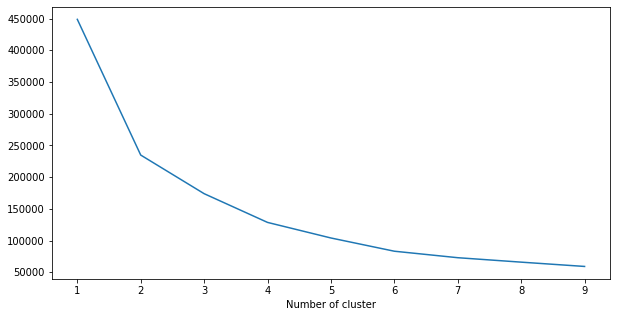

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

mesmo resultado do teste do cotovelo, pode ser um bom sinal.

In [ ]:
for nc in range(2, 12):
  print('Numero de grupos', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df_num_nor)
  ss = silhouette_score(df_num_nor, kmeans.labels_)
  print('Silhouette Score:', ss)
  print('-'*30)

quase nenhuma diferença de pontuação entre 2 e 9 grupos... muito estranho.

de novo, vamos tentar criar os clusters e ver o resultado diretamente. primeiramente com 4.

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=25, max_iter=1000, random_state=0).fit(df_num_nor)

In [ ]:
# de novo joguei os clusters direto no DF pré-normalização para não ter que fazer o inverse_transform
df_num["cluster"] = kmeans.labels_

In [ ]:
df_num.groupby('cluster').describe()

Ok, bem melhor agora, cada cluster está bem diferente.

Vamos testar com 5 para ver se dá para extrair ainda mais informações.

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=25, max_iter=1000, random_state=0).fit(df_num_nor)

In [ ]:
df["cluster"] = kmeans.labels_

In [ ]:
df.groupby('cluster').describe()

opa, ainda mais rico! acho que esse é o nosso resultado final.

vamos só reordenar para ficar mais legível, e daí já exportar.

In [ ]:
df.cluster.replace([0, 1, 2, 3, 4], [1, 3, 2, 5, 4], inplace=True)

In [ ]:
df.groupby('cluster').describe()

In [ ]:
df.to_csv('Data/05-resultado-final.csv')